# Analyse des Correspondances Multiples (ACM)

## Mastère ESD - Introduction au Machine Learning

## Librairies utilisées

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from prince import MCA

## Données utilisées

Données des passagers du Titanic [à télécharger](titanic.csv)

In [2]:
df = pandas.read_csv("titanic.csv")
df.head()

,Class,Sex,Age,Survived
0,1st,Male,Adult,No
1,3rd,Male,Adult,Yes
2,Crew,Male,Adult,No
3,Crew,Male,Adult,Yes
4,2nd,Male,Adult,No


## Calcul de ACM

In [3]:
mca = MCA(n_components = 10)
mca.fit(df)

MCA(n_components=10)

## Valeurs propres

In [4]:
print(mca.eigenvalues_)
print(mca.total_inertia_)
print(mca.percentage_of_variance_)

[4.45079473e-01 3.05043732e-01 2.50006001e-01 2.05037306e-01
 1.78515160e-01 1.16318328e-01 4.85494016e-33 1.42400212e-33
 3.71815520e-34]
1.5000000000000373
[2.96719649e+01 2.03362488e+01 1.66670667e+01 1.36691537e+01
 1.19010107e+01 7.75455520e+00 3.23662678e-31 9.49334747e-32
 2.47877013e-32]


In [5]:
eig = pandas.DataFrame(
    { 
        "Dimension" : ["Dim" + str(x + 1) for x in range(9)],
        "Valeur propre": mca.eigenvalues_,
        "% variance expliquée": numpy.round(mca.percentage_of_variance_, 4),
        "% variance expliquée cumulée": numpy.round(numpy.cumsum(mca.percentage_of_variance_), 4),
    }
)
eig

,Dimension,Valeur propre,% variance expliquée,% variance expliquée cumulée
0,Dim1,4.450795e-01,29.6720,29.6720
1,Dim2,3.050437e-01,20.3362,50.0082
2,Dim3,2.500060e-01,16.6671,66.6753
3,Dim4,2.050373e-01,13.6692,80.3444
4,Dim5,1.785152e-01,11.9010,92.2454
5,Dim6,1.163183e-01,7.7546,100.0000
6,Dim7,4.854940e-33,0.0000,100.0000
7,Dim8,1.424002e-33,0.0000,100.0000
8,Dim9,3.718155e-34,0.0000,100.0000


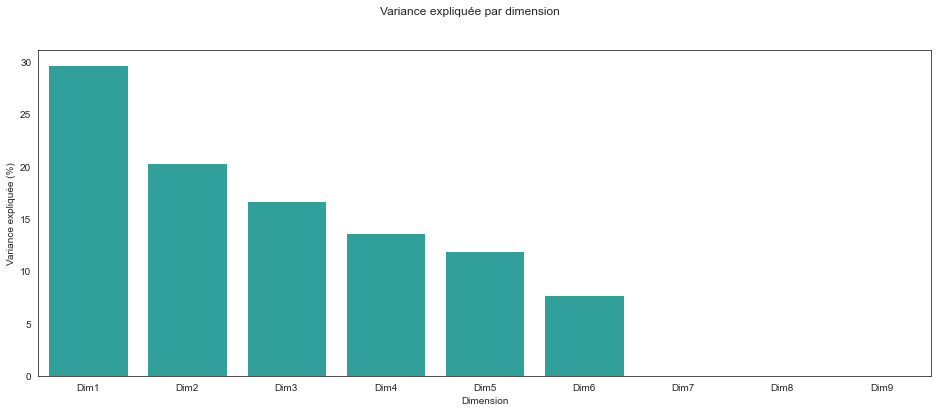

In [6]:
plt.figure(figsize=(16, 6))
g_eig = seaborn.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        color = "lightseagreen",
                        data = eig)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

## Représentation des individus

In [7]:
df_ind = pandas.DataFrame(mca.row_coordinates(df)).rename(columns = {i: "Dim"+str(i+1) for i in range(10)})
df_ind.head()

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9
0,0.055104,-0.541784,-0.446235,-0.172001,1.057355,-0.000739,0.004029,-0.30581,-0.723675
1,0.263386,0.233400,-0.324961,-0.102804,-0.444944,-0.834395,0.004029,-0.30581,-0.723675
2,-0.652721,-0.202892,0.039900,0.211090,-0.065702,0.232969,0.004029,-0.30581,-0.723675
3,-0.061709,-0.469458,0.045706,0.573659,-0.521356,-0.386500,0.004029,-0.30581,-0.723675
4,-0.132518,0.129916,1.194787,-0.423667,0.461580,-0.162475,0.004029,-0.30581,-0.723675


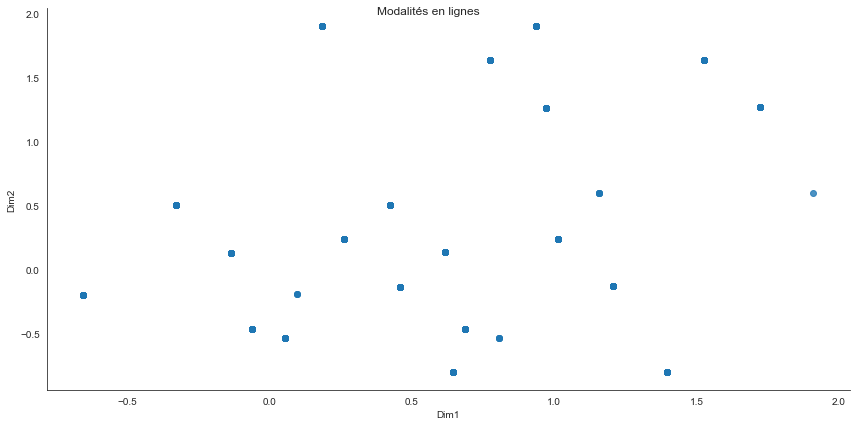

In [8]:
g_ind = seaborn.lmplot(x = "Dim1", y = "Dim2", data = df_ind, fit_reg = False, 
                       height = 6, aspect = 2)
g_ind.fig.suptitle("Modalités en lignes")
plt.show()

In [9]:
df_ind_bis = df_ind.filter(["Dim1", "Dim2"]).groupby(["Dim1", "Dim2"]).agg(Nb = ("Dim1", "count")).reset_index()
df_ind_bis.head()

,Dim1,Dim2,Nb
0,-0.652721,-0.202892,670
1,-0.327626,0.499967,387
2,-0.132518,0.129916,154
3,-0.061709,-0.469458,192
4,0.055104,-0.541784,118


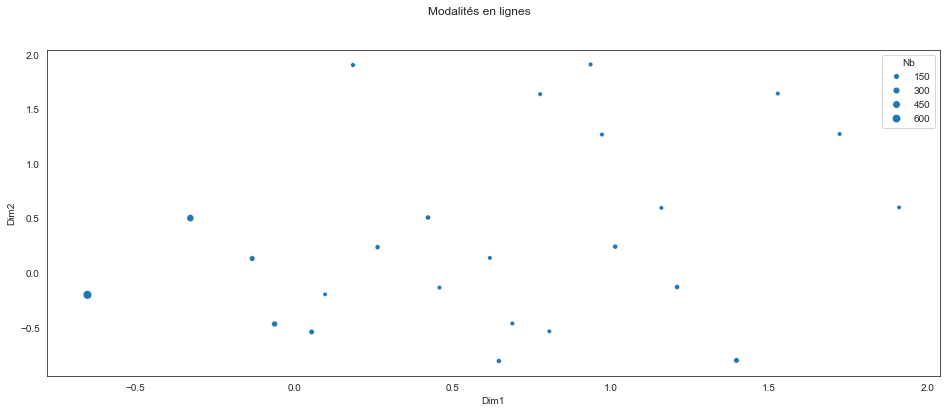

In [10]:
plt.figure(figsize=(16, 6))
g_ind = seaborn.scatterplot(x = "Dim1", y = "Dim2", size = "Nb", data = df_ind_bis)
g_ind.figure.suptitle("Modalités en lignes")
plt.show()

## Représentation des variables

In [11]:
df_var = pandas.DataFrame(mca.column_coordinates(df)).rename(columns = {i: "Dim"+str(i+1) for i in range(10)})
df_var

/usr/local/lib/python3.9/site-packages/prince/ca.py:206: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  is_sparse = X.dtypes.apply(pd.api.types.is_sparse).all()


,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9
Class_1st,1.151941,-1.231418,-0.890008,-0.049533,1.460940,-0.005902,0.395783,0.006324,-0.171133
Class_2nd,0.651259,0.252522,2.392076,-0.505359,0.454055,-0.226544,0.395783,0.006324,-0.171133
Class_3rd,0.130599,1.070050,-0.659068,-0.580899,-0.307933,-0.298099,0.395783,0.006324,-0.171133
Class_Crew,-0.736941,-0.482727,0.082275,0.644339,-0.437074,0.312928,0.395783,0.006324,-0.171133
Sex_Female,1.574794,0.008927,-0.009280,-0.338706,-0.501996,0.914393,0.395783,0.006324,-0.171133
Sex_Male,-0.427587,-0.002424,0.002520,0.091965,0.136302,-0.248275,0.395783,0.006324,-0.171133
Age_Adult,-0.067828,-0.153321,-0.001242,-0.141832,-0.059028,-0.019826,0.395783,0.006324,-0.171133
Age_Child,1.301802,2.942646,0.023828,2.722128,1.132903,0.380510,0.395783,0.006324,-0.171133
Survived_No,-0.509477,0.190238,-0.003751,-0.212137,0.248761,0.272994,0.395783,0.006324,-0.171133
Survived_Yes,1.067680,-0.398669,0.007861,0.444562,-0.521314,-0.572097,0.395783,0.006324,-0.171133


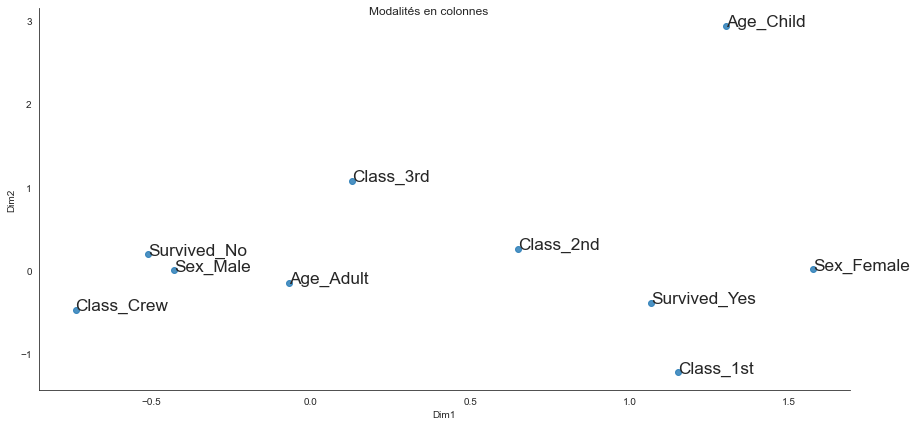

In [12]:
g_var = seaborn.lmplot(x = "Dim1", y = "Dim2", data = df_var, fit_reg = False, 
                       height = 6, aspect = 2)
g_var.fig.suptitle("Modalités en colonnes")
for i in df_var.index:
    plt.text(df_var.loc[i].Dim1, df_var.loc[i].Dim2, i, size = "xx-large")
plt.show()

## Représentation simultanée

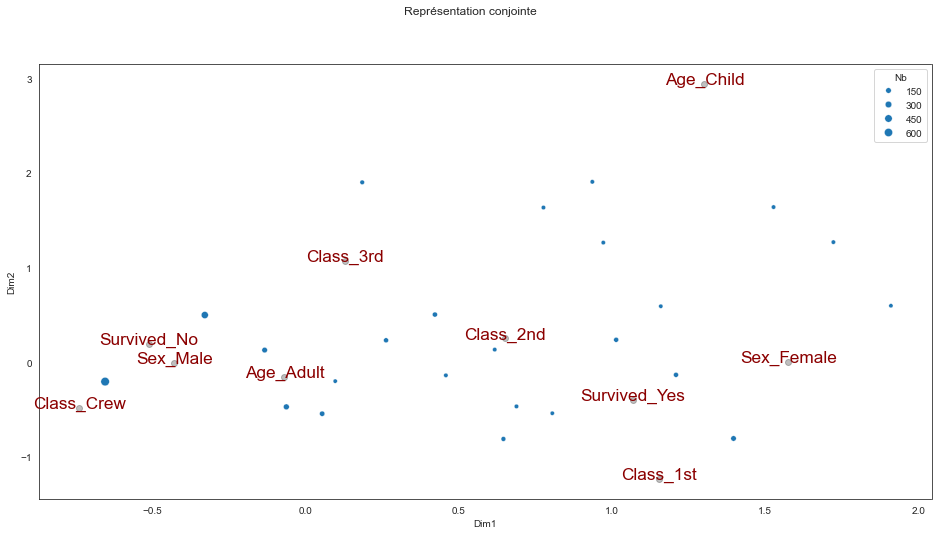

In [13]:
plt.figure(figsize=(16, 8))

g_simult = seaborn.scatterplot(x = "Dim1", y = "Dim2", size = "Nb", data = df_ind_bis)

for i in df_var.index:
    plt.scatter(df_var.loc[i].Dim1, df_var.loc[i].Dim2, alpha = .25, c = "black")
    plt.text(df_var.loc[i].Dim1, df_var.loc[i].Dim2, i, size = "xx-large", color = "darkred", ha = "center")

g_simult.figure.suptitle("Représentation conjointe")

plt.show()